# Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_cross = pd.read_csv('./assets/oasis_cross-sectional.csv')
data_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [3]:
data_long = pd.read_csv('./assets/oasis_longitudinal.csv')
data_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data_long.rename(columns = {'EDUC' : 'Educ'}, inplace = True)

In [5]:
data = pd.concat([data_cross, data_long])
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,MRI ID,Group,Visit,MR Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 372
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          436 non-null    object 
 1   M/F         809 non-null    object 
 2   Hand        809 non-null    object 
 3   Age         809 non-null    int64  
 4   Educ        608 non-null    float64
 5   SES         570 non-null    float64
 6   MMSE        606 non-null    float64
 7   CDR         608 non-null    float64
 8   eTIV        809 non-null    int64  
 9   nWBV        809 non-null    float64
 10  ASF         809 non-null    float64
 11  Delay       20 non-null     float64
 12  Subject ID  373 non-null    object 
 13  MRI ID      373 non-null    object 
 14  Group       373 non-null    object 
 15  Visit       373 non-null    float64
 16  MR Delay    373 non-null    float64
dtypes: float64(9), int64(2), object(6)
memory usage: 113.8+ KB


In [7]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Visit,MR Delay
count,809.000000,608.000000,570.00000,606.000000,608.000000,809.000000,809.000000,809.000000,20.00000,373.000000,373.000000
mean,63.186650,10.184211,2.47193,27.234323,0.288651,1484.782447,0.763037,1.197311,20.55000,1.882038,595.104558
std,23.117511,6.058388,1.12805,3.687980,0.377697,166.911689,0.059401,0.133031,23.86249,0.922843,635.485118
min,18.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.644000,0.876000,1.00000,1.000000,0.000000
25%,49.000000,4.000000,2.00000,26.000000,0.000000,1361.000000,0.715000,1.108000,2.75000,1.000000,0.000000
50%,72.000000,12.000000,2.00000,29.000000,0.000000,1475.000000,0.754000,1.190000,11.00000,2.000000,552.000000
75%,80.000000,16.000000,3.00000,30.000000,0.500000,1583.000000,0.817000,1.290000,30.75000,2.000000,873.000000
max,98.000000,23.000000,5.00000,30.000000,2.000000,2004.000000,0.893000,1.587000,89.00000,5.000000,2639.000000


In [8]:
data.isnull().sum()

ID            373
M/F             0
Hand            0
Age             0
Educ          201
SES           239
MMSE          203
CDR           201
eTIV            0
nWBV            0
ASF             0
Delay         789
Subject ID    436
MRI ID        436
Group         436
Visit         436
MR Delay      436
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Educ'}>,
        <Axes: title={'center': 'SES'}>],
       [<Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>],
       [<Axes: title={'center': 'nWBV'}>,
        <Axes: title={'center': 'ASF'}>,
        <Axes: title={'center': 'Delay'}>],
       [<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'MR Delay'}>, <Axes: >]], dtype=object)

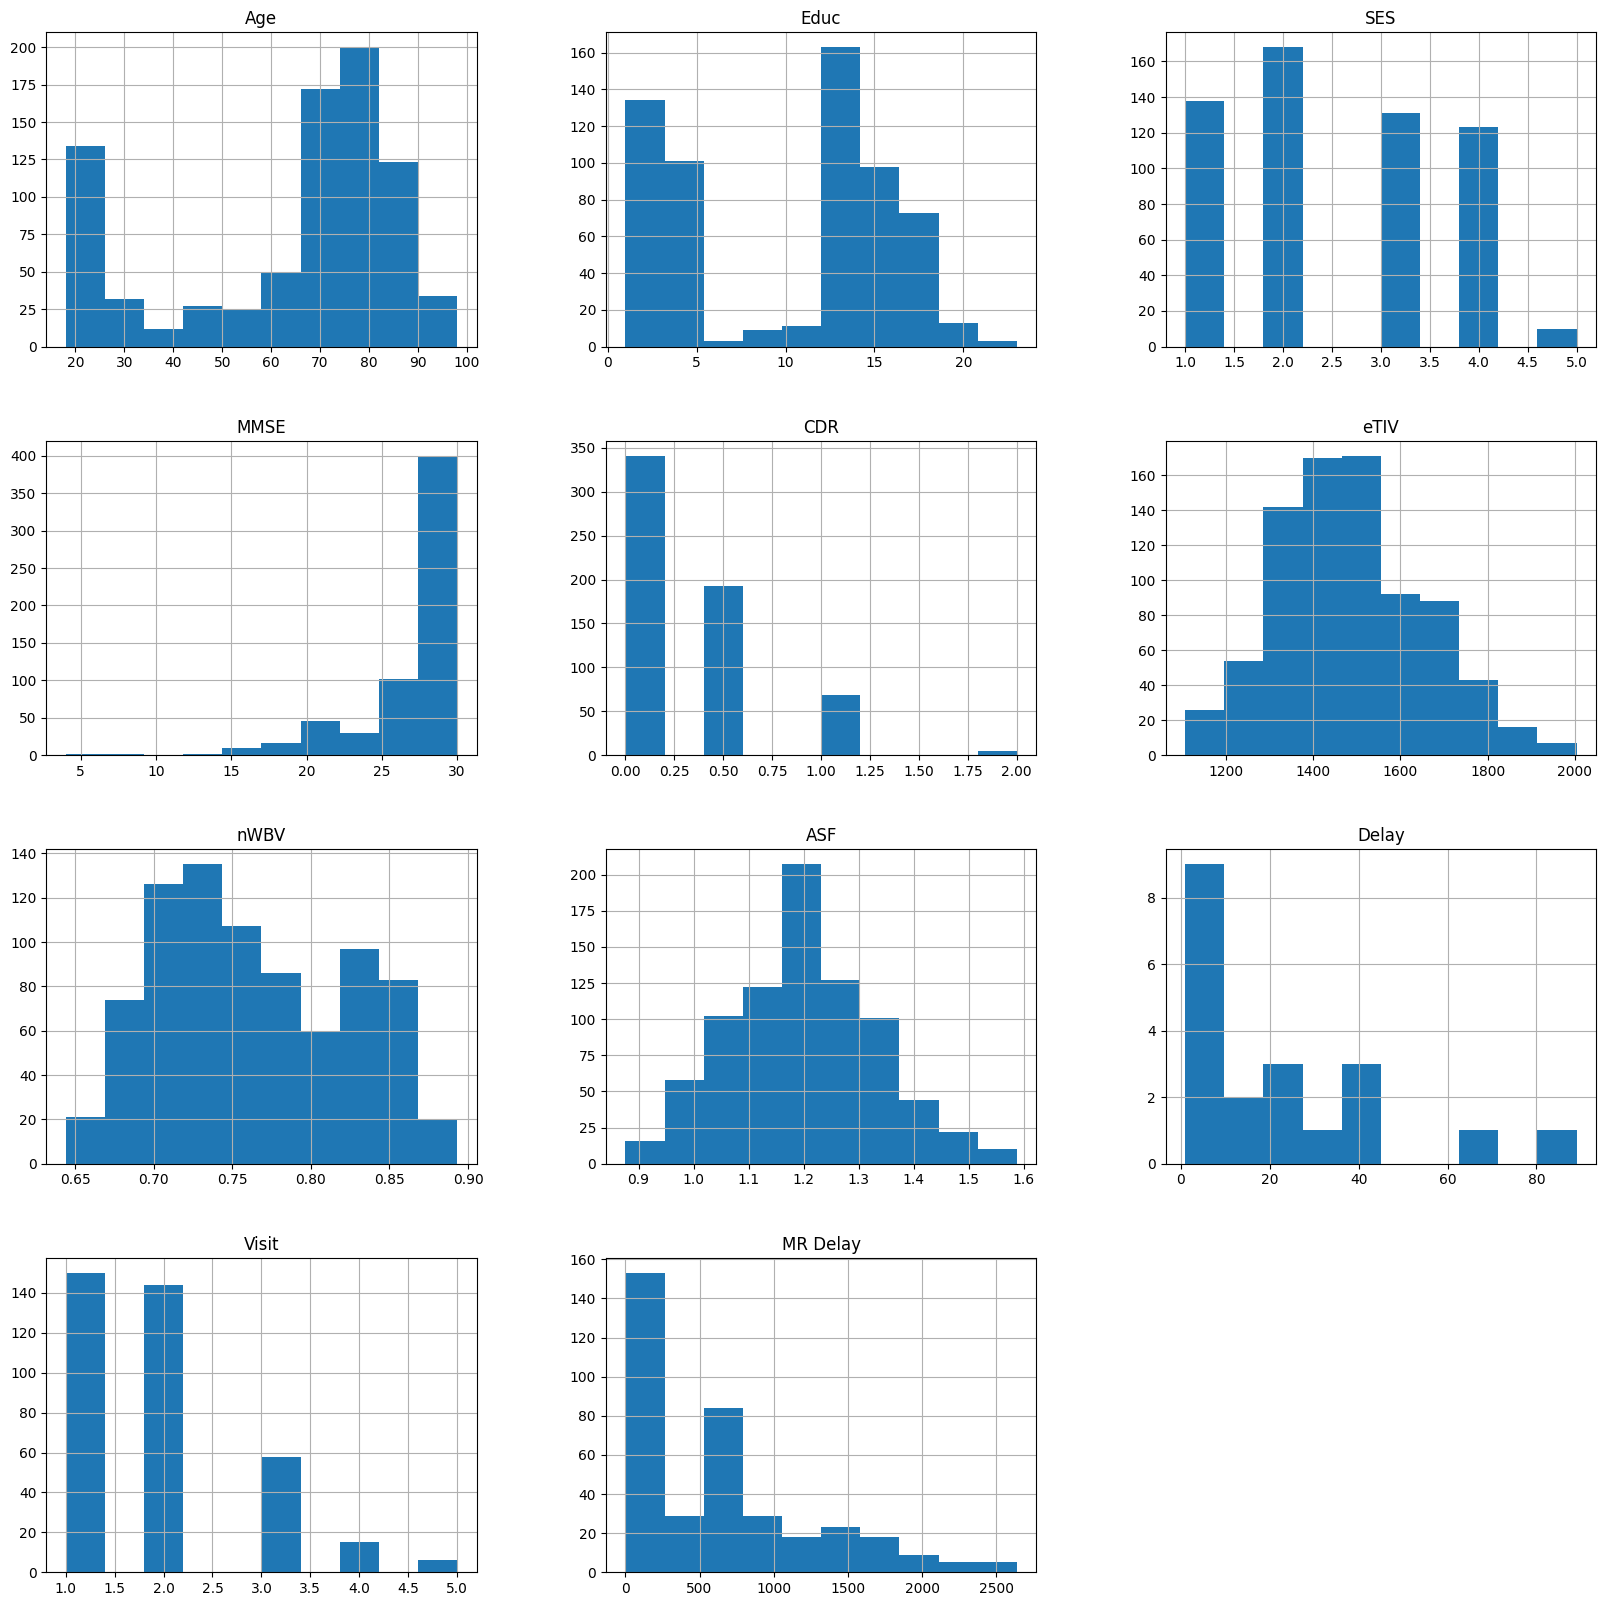

In [9]:
data.hist(figsize = (20, 20))

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Educ', ylabel='Age'>,
        <Axes: xlabel='SES', ylabel='Age'>,
        <Axes: xlabel='MMSE', ylabel='Age'>,
        <Axes: xlabel='CDR', ylabel='Age'>,
        <Axes: xlabel='eTIV', ylabel='Age'>,
        <Axes: xlabel='nWBV', ylabel='Age'>,
        <Axes: xlabel='ASF', ylabel='Age'>,
        <Axes: xlabel='Delay', ylabel='Age'>,
        <Axes: xlabel='Visit', ylabel='Age'>,
        <Axes: xlabel='MR Delay', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Educ'>,
        <Axes: xlabel='Educ', ylabel='Educ'>,
        <Axes: xlabel='SES', ylabel='Educ'>,
        <Axes: xlabel='MMSE', ylabel='Educ'>,
        <Axes: xlabel='CDR', ylabel='Educ'>,
        <Axes: xlabel='eTIV', ylabel='Educ'>,
        <Axes: xlabel='nWBV', ylabel='Educ'>,
        <Axes: xlabel='ASF', ylabel='Educ'>,
        <Axes: xlabel='Delay', ylabel='Educ'>,
        <Axes: xlabel='Visit', ylabel='Educ'>,
        <Axes: xlabel='MR Delay', ylabel='Ed

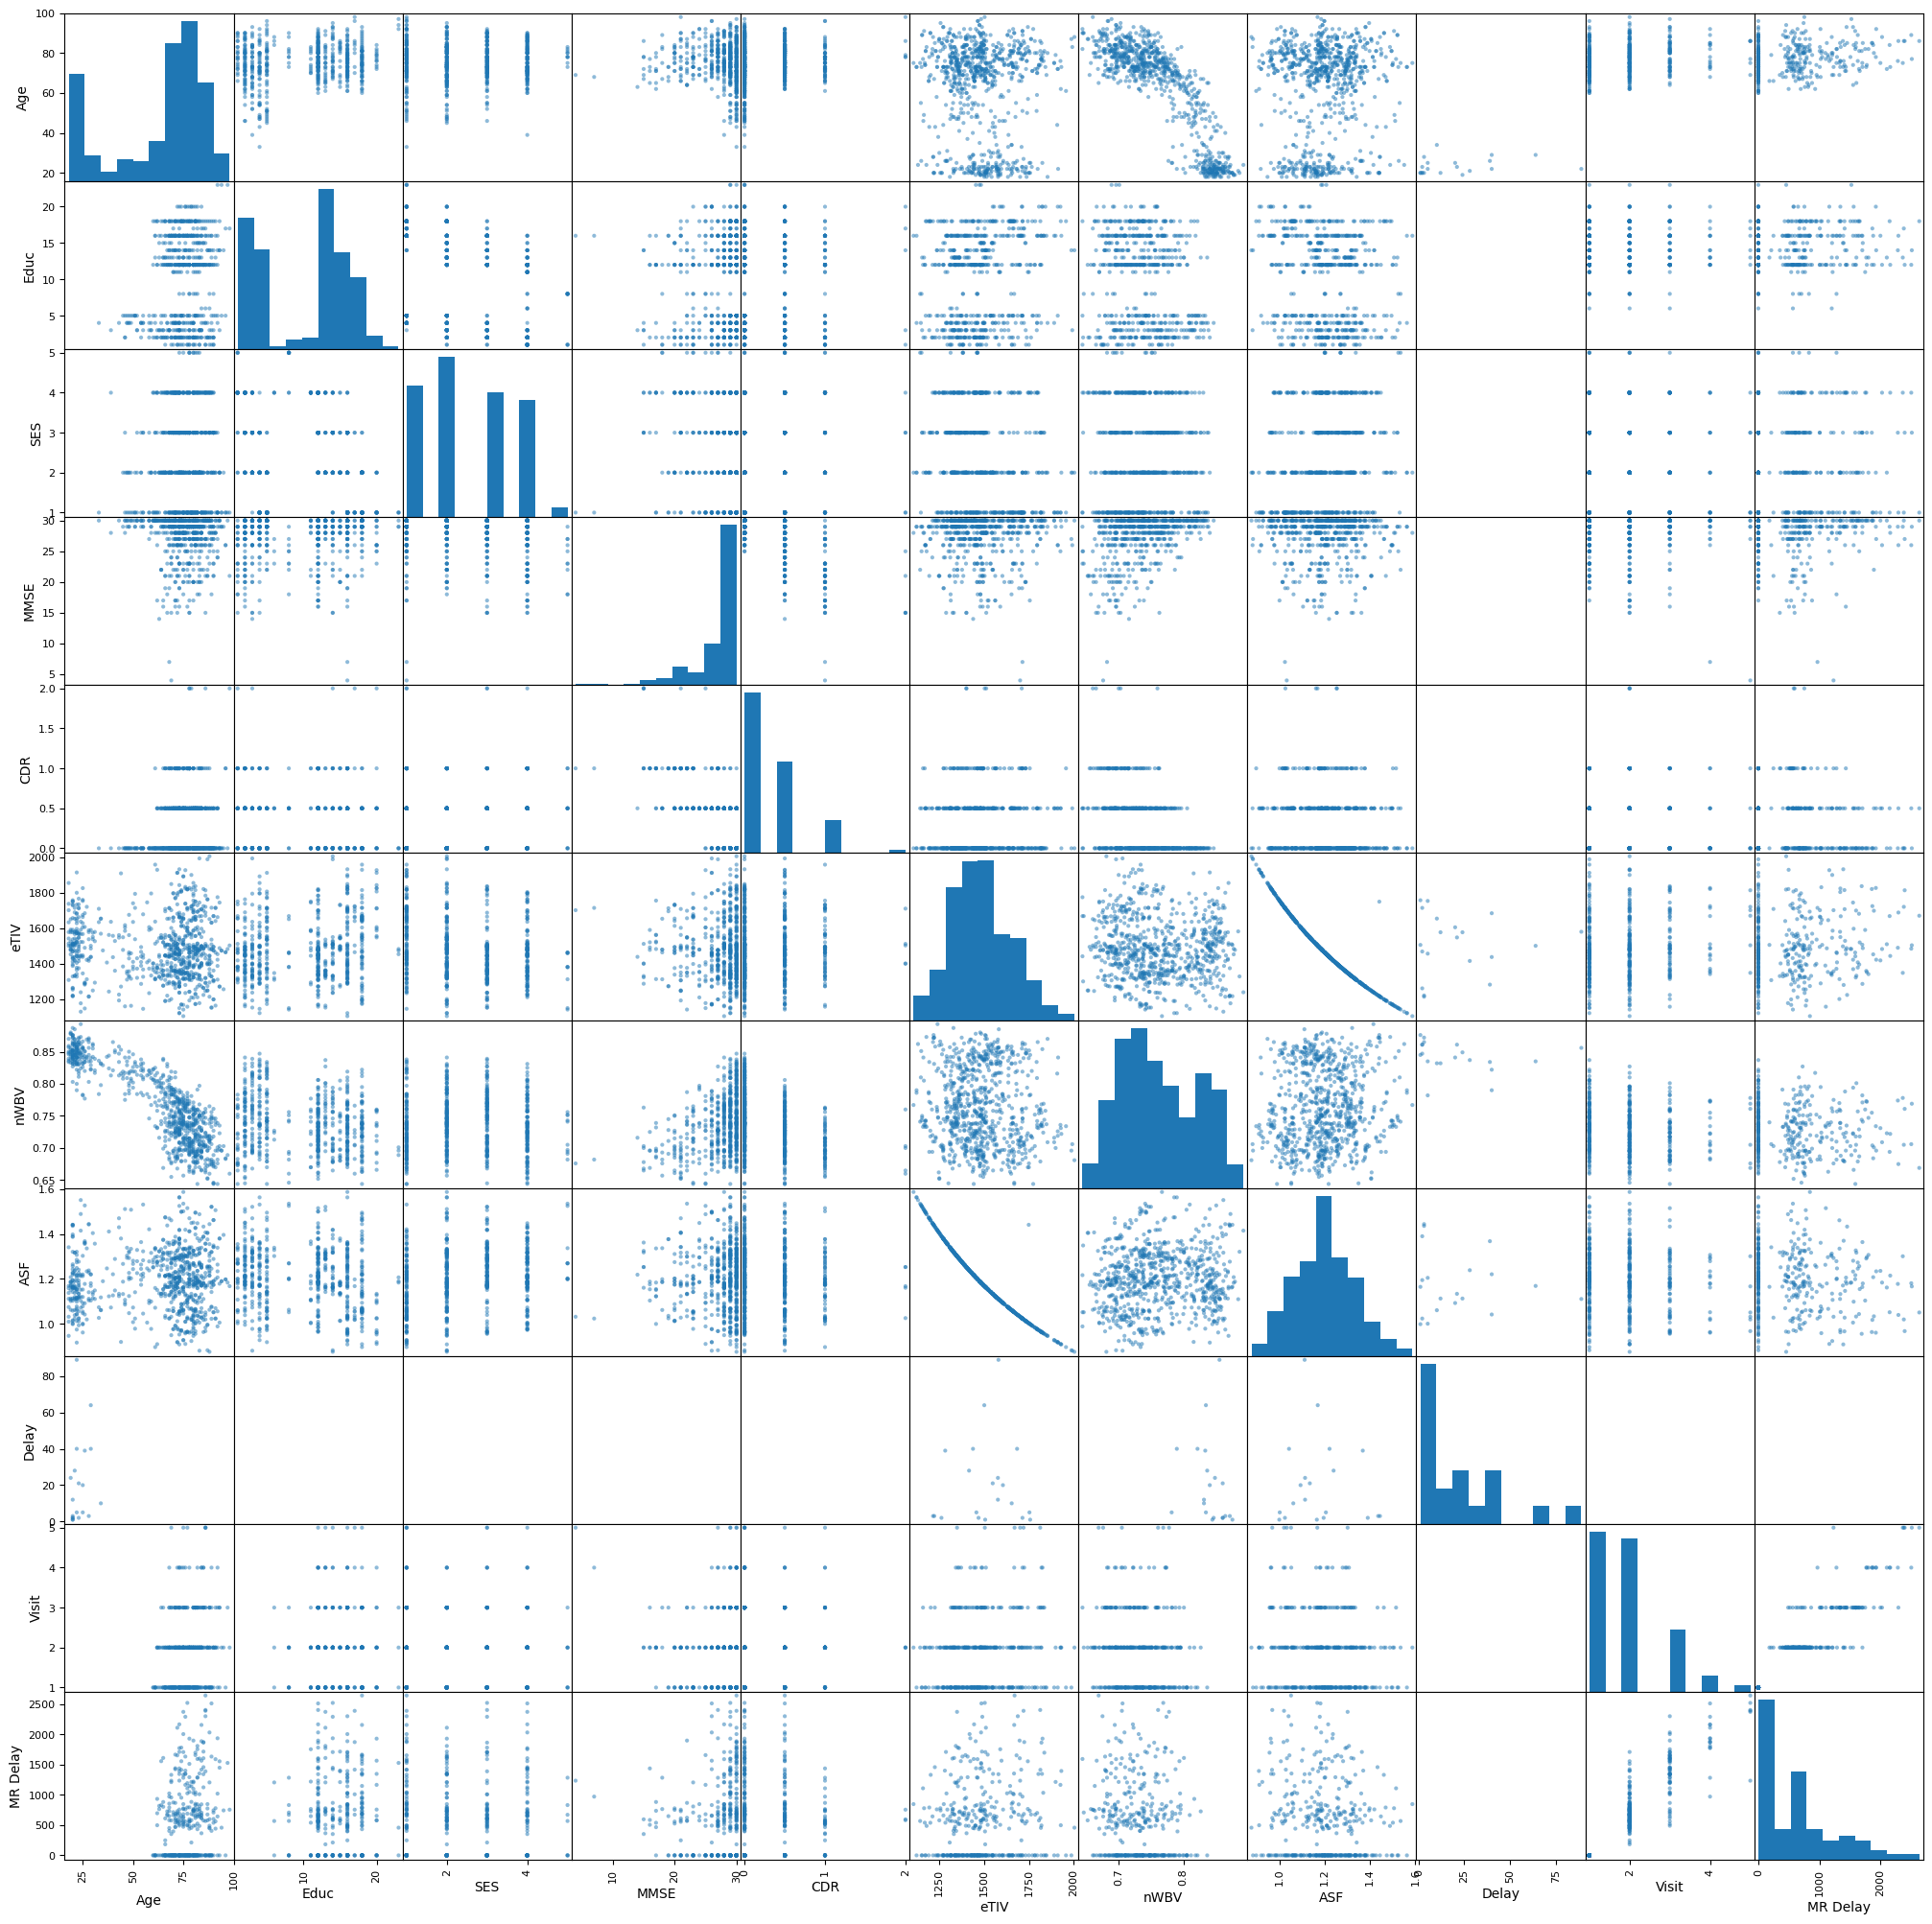

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (25, 25))

In [11]:
data.drop(columns = ['ID', 'Subject ID', 'MRI ID', 'Hand'], axis = 1, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   M/F       809 non-null    object 
 1   Age       809 non-null    int64  
 2   Educ      608 non-null    float64
 3   SES       570 non-null    float64
 4   MMSE      606 non-null    float64
 5   CDR       608 non-null    float64
 6   eTIV      809 non-null    int64  
 7   nWBV      809 non-null    float64
 8   ASF       809 non-null    float64
 9   Delay     20 non-null     float64
 10  Group     373 non-null    object 
 11  Visit     373 non-null    float64
 12  MR Delay  373 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 88.5+ KB


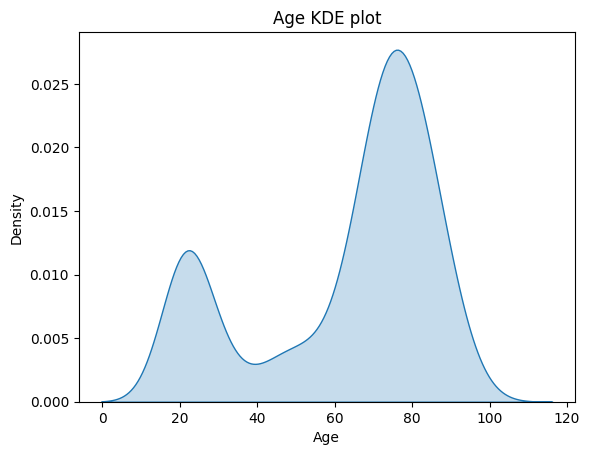

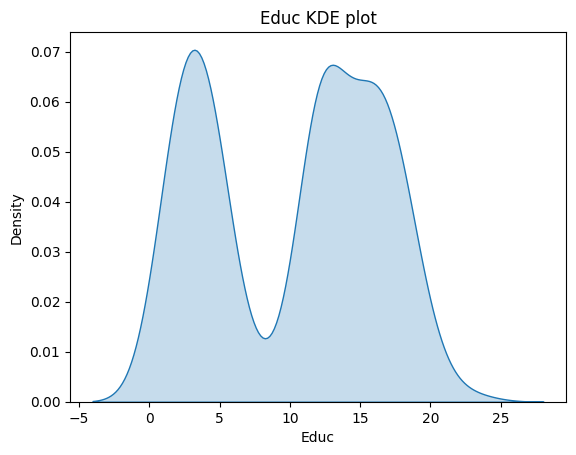

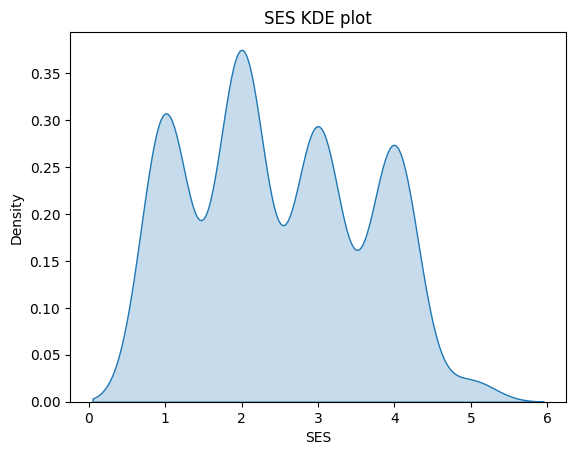

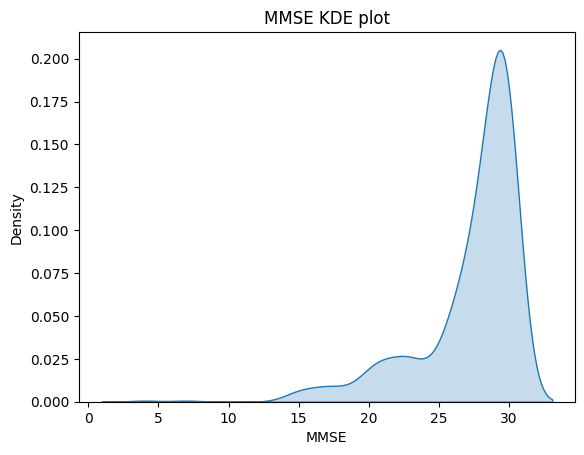

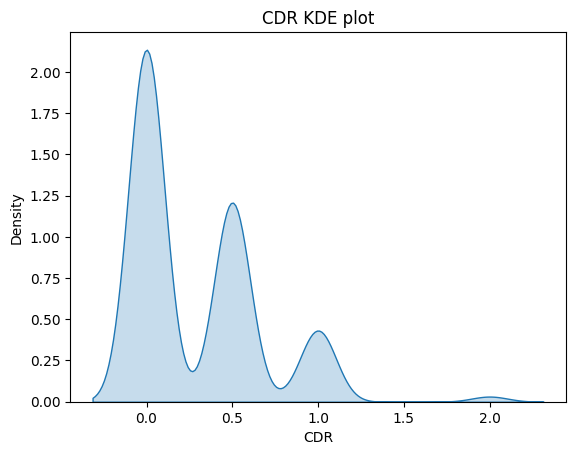

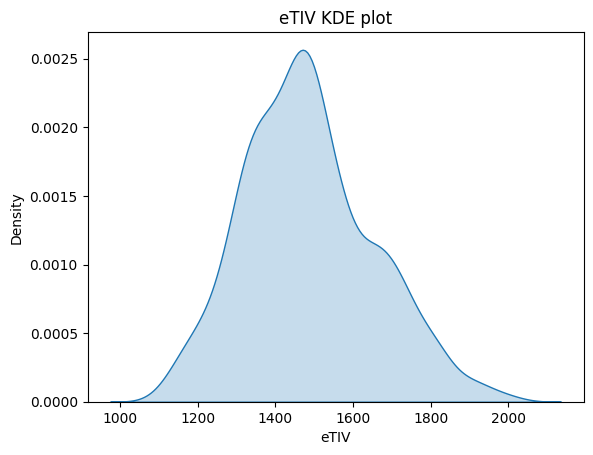

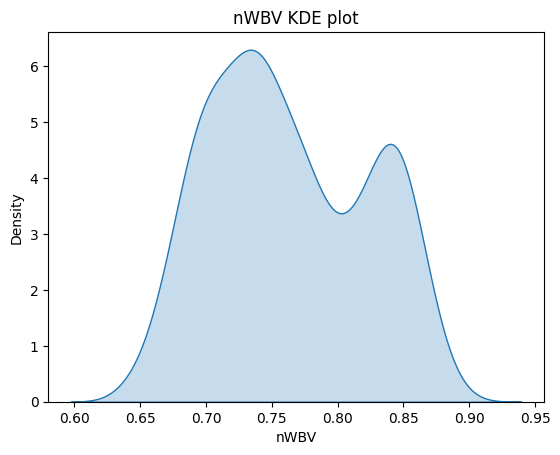

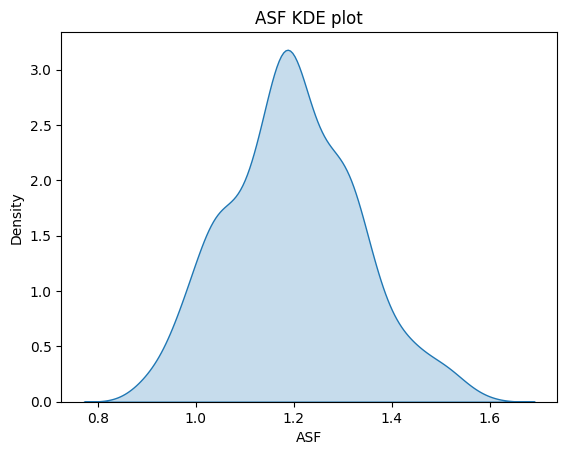

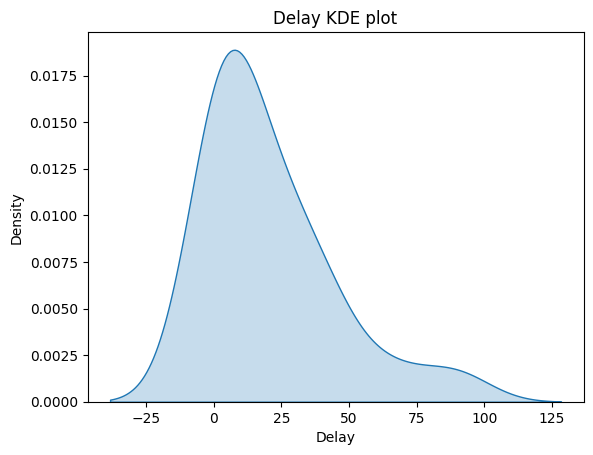

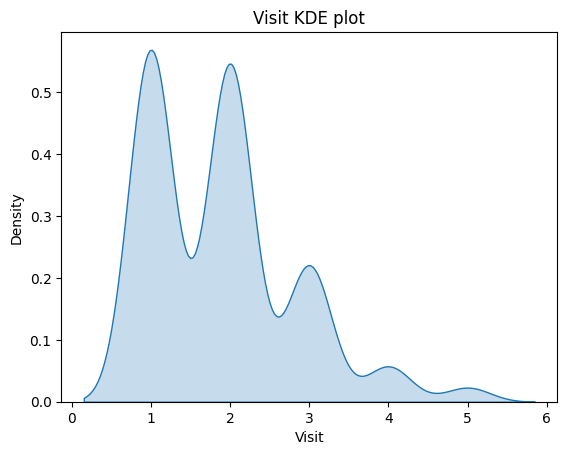

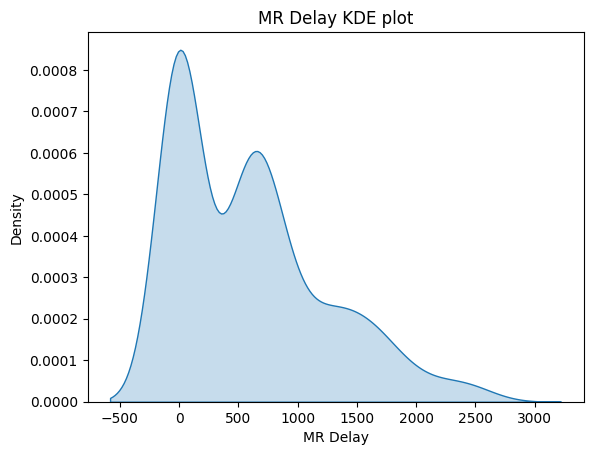

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include=['int', 'float'])
for i in numeric_cols :
    sns.kdeplot(data[i], fill = True)
    plt.title(i + ' KDE plot')
    plt.show()

In [14]:
for col in data.columns :
    if data[col].dtype!='object' :
        data[col] = data[col].fillna(data[col].median())
    else :
        data[col] = data[col].fillna(data[col].mode()[0])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   M/F       809 non-null    object 
 1   Age       809 non-null    int64  
 2   Educ      809 non-null    float64
 3   SES       809 non-null    float64
 4   MMSE      809 non-null    float64
 5   CDR       809 non-null    float64
 6   eTIV      809 non-null    int64  
 7   nWBV      809 non-null    float64
 8   ASF       809 non-null    float64
 9   Delay     809 non-null    float64
 10  Group     809 non-null    object 
 11  Visit     809 non-null    float64
 12  MR Delay  809 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 88.5+ KB


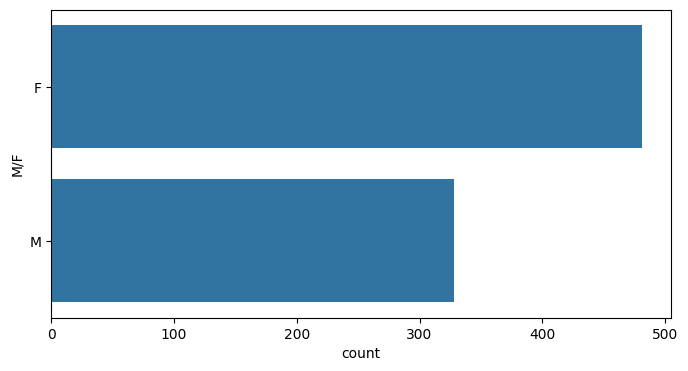

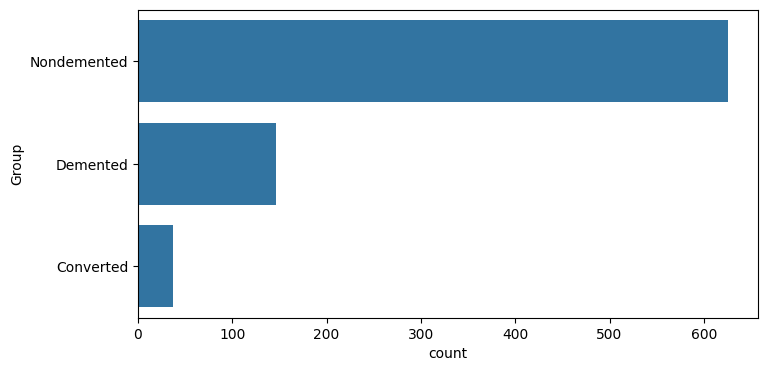

In [16]:
obj_cols = data.select_dtypes(include = 'object')

for i in obj_cols :
    plt.figure(figsize = (8, 4))
    sns.countplot(data[i])
    plt.show()

In [17]:
data['Group'].value_counts()

Group
Nondemented    626
Demented       146
Converted       37
Name: count, dtype: int64

In [18]:
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Group,Visit,MR Delay
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,11.0,Nondemented,2.0,552.0
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,11.0,Nondemented,2.0,552.0
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,11.0,Nondemented,2.0,552.0
3,M,28,12.0,2.0,29.0,0.0,1588,0.803,1.105,11.0,Nondemented,2.0,552.0
4,M,18,12.0,2.0,29.0,0.0,1737,0.848,1.010,11.0,Nondemented,2.0,552.0


In [19]:
data['Group'].value_counts()

Group
Nondemented    626
Demented       146
Converted       37
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
ss = StandardScaler()

for col in numeric_cols :
    data[[col]] = ss.fit_transform(data[[col]])

for col in obj_cols :
    data[col] = le.fit_transform(data[col])

In [21]:
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Group,Visit,MR Delay
0,0,0.468045,-1.627429,0.687969,0.403255,-0.619577,-0.843976,-0.337530,0.817521,-0.059829,2,0.086531,-0.046062
1,0,-0.354351,-1.250506,-1.373390,0.403255,-0.619577,-2.024971,0.791103,2.509901,-0.059829,2,0.086531,-0.046062
2,0,0.424761,-1.250506,0.687969,-0.206527,0.808451,-0.184538,-0.927115,0.072874,-0.059829,2,0.086531,-0.046062
3,1,-1.523019,0.257183,-0.342710,0.403255,-0.619577,0.618779,0.673186,-0.694338,-0.059829,2,0.086531,-0.046062
4,1,-1.955859,0.257183,-0.342710,0.403255,-0.619577,1.512019,1.431224,-1.408898,-0.059829,2,0.086531,-0.046062


# Modelling

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = np.array(data.drop('Group', axis = 1))
y = np.array(data['Group'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train

array([[ 1.        ,  0.68446521,  1.76487258, ..., -0.05982875,
        -1.5044546 , -1.32543517],
       [ 0.        ,  1.11730533,  0.4456443 , ..., -0.05982875,
        -1.5044546 , -1.32543517],
       [ 1.        ,  0.85760126,  0.25718312, ..., -0.05982875,
         0.08653072,  1.01544711],
       ...,
       [ 0.        ,  1.16058934, -1.6274287 , ..., -0.05982875,
         0.08653072, -0.04606188],
       [ 0.        , -1.60958739,  0.25718312, ...,  7.03567297,
         0.08653072, -0.04606188],
       [ 1.        ,  0.90088527, -1.43896752, ..., -0.05982875,
         0.08653072, -0.04606188]])

### Logistic Regression

In [26]:
log_reg = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ", grid_search.best_params_)

Best parameters for Logistic Regression:  {'C': 1}


### KNN

In [27]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,3,5,7]}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for KNN: ", grid_search.best_params_)

Best parameters for KNN:  {'n_neighbors': 7}


### SVM

In [28]:
svm = SVC()

param_grid = {'C': [10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for SVM: ", grid_search.best_params_)


Best parameters for SVM:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


### RF

In [29]:
rf = RandomForestClassifier()

# Define the parameters for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Random Forest Classifier: ", grid_search.best_params_)

Best parameters for Random Forest Classifier:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Results

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.93      0.74      0.83        35
           2       0.90      1.00      0.95       119

    accuracy                           0.90       162
   macro avg       0.78      0.62      0.66       162
weighted avg       0.89      0.90      0.88       162

Confusion matrix for Logistic Regression:



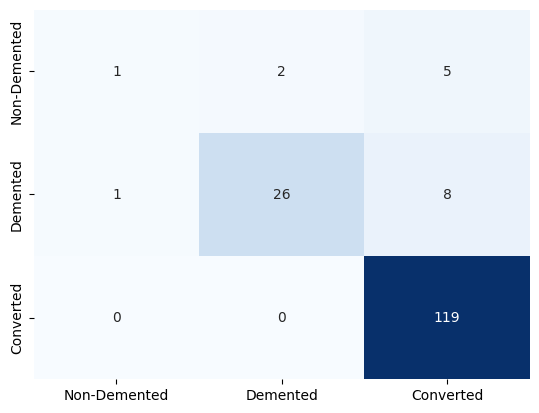

Classification report for KNN:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.88      0.83      0.85        35
           2       0.93      1.00      0.96       119

    accuracy                           0.92       162
   macro avg       0.94      0.65      0.68       162
weighted avg       0.92      0.92      0.90       162

Confusion matrix for KNN:



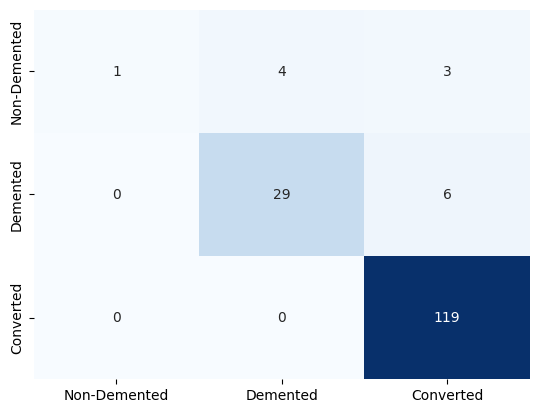

Classification report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      0.66      0.78        35
           2       0.86      1.00      0.93       119

    accuracy                           0.88       162
   macro avg       0.61      0.55      0.57       162
weighted avg       0.84      0.88      0.85       162

Confusion matrix for SVM:



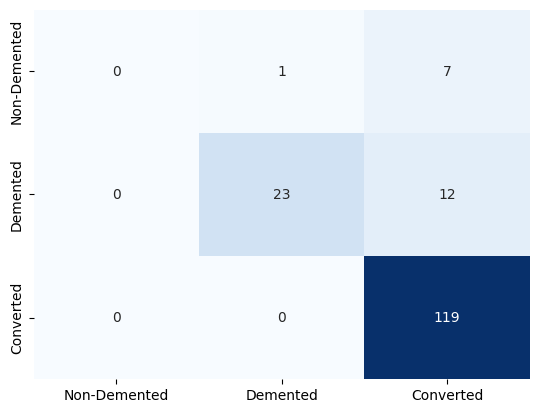

Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.94      0.94      0.94        35
           2       0.98      1.00      0.99       119

    accuracy                           0.96       162
   macro avg       0.84      0.77      0.80       162
weighted avg       0.95      0.96      0.95       162

Confusion matrix for Random Forest:



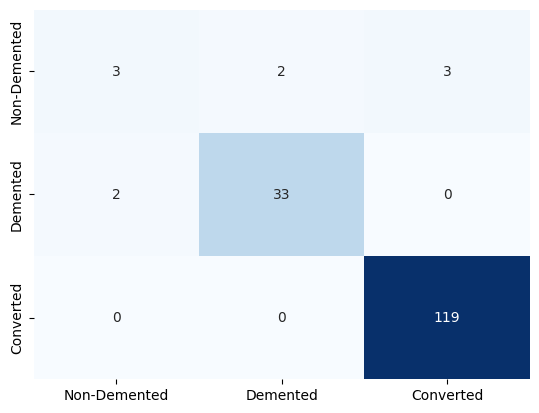

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

models = {'Logistic Regression' : log_reg, 'KNN' : knn, 'SVM' : svm, 'Random Forest' : rf}

best_params = {
    'Logistic Regression': {'C': 1.0}, 
    'KNN': {'n_neighbors': 7}, 
    'SVM': {'C': 1.0, 'gamma' : 0.01, 'kernel': 'rbf'}, 
    'Random Forest' : {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
}

for model_name, model in models.items():
    model.set_params(**best_params[model_name])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Classification report for {model_name}:\n", classification_report(y_test, y_pred, zero_division=False))
    print(f"Confusion matrix for {model_name}:\n")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels=['Non-Demented', 'Demented', 'Converted'], yticklabels=['Non-Demented', 'Demented', 'Converted'])
    plt.show()


# ANN

In [31]:
X_train.shape

(647, 12)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape = (12,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)              │     13,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 512)               │    524,800 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 256)               │    131,328 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 3)                 │         99 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 712,771 (2.72 MB)

 Trainable params: 712,771 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
data['Group']

0      2
1      2
2      2
3      2
4      2
      ..
368    1
369    1
370    2
371    2
372    2
Name: Group, Length: 809, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
data[['Group']] = ohe.fit_transform(data[['Group']])

In [36]:
data['Group'] = data['Group'].apply(lambda x: x.toarray()[0])

In [37]:
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Group,Visit,MR Delay
0,0,0.468045,-1.627429,0.687969,0.403255,-0.619577,-0.843976,-0.337530,0.817521,-0.059829,"[0.0, 0.0, 1.0]",0.086531,-0.046062
1,0,-0.354351,-1.250506,-1.373390,0.403255,-0.619577,-2.024971,0.791103,2.509901,-0.059829,"[0.0, 0.0, 1.0]",0.086531,-0.046062
2,0,0.424761,-1.250506,0.687969,-0.206527,0.808451,-0.184538,-0.927115,0.072874,-0.059829,"[0.0, 0.0, 1.0]",0.086531,-0.046062
3,1,-1.523019,0.257183,-0.342710,0.403255,-0.619577,0.618779,0.673186,-0.694338,-0.059829,"[0.0, 0.0, 1.0]",0.086531,-0.046062
4,1,-1.955859,0.257183,-0.342710,0.403255,-0.619577,1.512019,1.431224,-1.408898,-0.059829,"[0.0, 0.0, 1.0]",0.086531,-0.046062


In [38]:
X = np.array(data.drop('Group', axis = 1))
y = np.array(data['Group'].tolist())

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [41]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 13s 662ms/step - accuracy: 0.3125 - loss: 1.0967
Epoch 1: val_accuracy improved from -inf to 0.90123, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7649 - loss: 0.7127 - val_accuracy: 0.9012 - val_loss: 0.6532
Epoch 2/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.2902
Epoch 2: val_accuracy improved from 0.90123 to 0.93827, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.1964 - val_accuracy: 0.9383 - val_loss: 0.1922
Epoch 3/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.1545
Epoch 3: val_accuracy improved from 0.93827 to 0.95062, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9497 - loss: 0.1394 - val_accuracy: 0.9506 - val_loss: 0.1243
Epoch 4/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0786
Epoch 4: val_accuracy did not improve from 0.95062
2

In [42]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [43]:
y_pred = np.argmax(y_pred, axis = 1)

In [44]:
y_test = np.argmax(y_test, axis = 1)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.97      0.94      0.96        35
           2       0.98      1.00      0.99       119

    accuracy                           0.96       162
   macro avg       0.87      0.81      0.84       162
weighted avg       0.96      0.96      0.96       162



<Axes: >

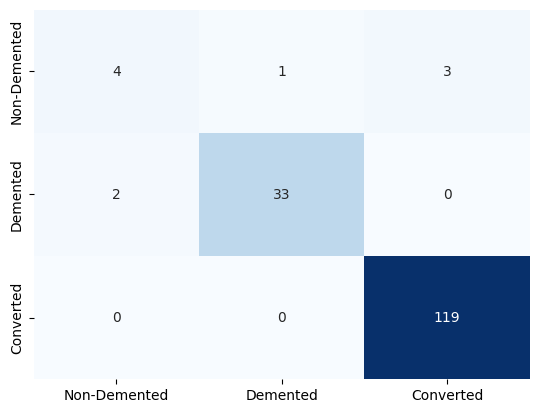

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels=['Non-Demented', 'Demented', 'Converted'], yticklabels=['Non-Demented', 'Demented', 'Converted'])

# Genetic Algorithm

In [47]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

space = {
    'dense_units_1': hp.choice('dense_units_1', [512, 1024, 2048]),
    'dense_units_2': hp.choice('dense_units_2', [256, 512, 1024]),
    'dense_units_3': hp.choice('dense_units_3', [128, 256, 512]),
    'dropout_1': hp.uniform('dropout_1', 0.3, 0.7),
    'dropout_2': hp.uniform('dropout_2', 0.3, 0.7),
    'dropout_3': hp.uniform('dropout_3', 0.3, 0.7),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(1e-2)),
    'batch_size': hp.choice('batch_size', [16, 32, 64]),
}

def objective(params):
    model = Sequential()
    model.add(Input(shape=(12,)))
    model.add(Dense(params['dense_units_1'], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(params['dropout_1']))
    model.add(Dense(params['dense_units_2'], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(params['dropout_2']))
    model.add(Dense(params['dense_units_3'], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(params['dropout_3']))
    model.add(Dense(3, activation='softmax'))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        callbacks=[reduce_lr, early_stopping],
                        verbose=0)
    
    val_acc = np.max(history.history['val_accuracy'])
    return {'loss': -val_acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("Best parameters: ", best)


100%|████████| 20/20 [01:11<00:00,  3.58s/trial, best loss: -0.9753086566925049]
Best parameters:  {'batch_size': 1, 'dense_units_1': 0, 'dense_units_2': 1, 'dense_units_3': 1, 'dropout_1': 0.4123532135371479, 'dropout_2': 0.36717904471091, 'dropout_3': 0.6714857786186568, 'learning_rate': 0.0009054962258589577}


In [48]:
best_params = {
    'dense_units_1': [512, 1024, 2048][best['dense_units_1']],
    'dense_units_2': [256, 512, 1024][best['dense_units_2']],
    'dense_units_3': [128, 256, 512][best['dense_units_3']],
    'dropout_1': best['dropout_1'],
    'dropout_2': best['dropout_2'],
    'dropout_3': best['dropout_3'],
    'learning_rate': best['learning_rate'],
    'batch_size': [16, 32, 64][best['batch_size']],
}

model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(best_params['dense_units_1'], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_1']))
model.add(Dense(best_params['dense_units_2'], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_2']))
model.add(Dense(best_params['dense_units_3'], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_3']))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_genetic_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=best_params['batch_size'],
                    validation_data=(X_val, y_val),
                    callbacks=[reduce_lr, early_stopping, model_checkpoint])

y_pred = model.predict(X_val)

Epoch 1/20
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4125 - loss: 1.8151   
Epoch 1: val_accuracy improved from -inf to 0.90741, saving model to best_genetic_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4612 - loss: 1.6965 - val_accuracy: 0.9074 - val_loss: 0.8346 - learning_rate: 9.0550e-04
Epoch 2/20
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6146 - loss: 1.3863 
Epoch 2: val_accuracy did not improve from 0.90741
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6384 - loss: 1.2461 - val_accuracy: 0.9074 - val_loss: 0.5962 - learning_rate: 9.0550e-04
Epoch 3/20
12/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.6459 
Epoch 3: val_accuracy improved from 0.90741 to 0.92593, saving model to best_genetic_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.6487 - val_accuracy: 0.9259 - val_loss: 0.4475 - learning_rate: 9.0550e-04
Epoch 4/20
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - l

In [58]:
y_pred = np.argmax(y_pred, axis = 1)
y_val = np.argmax(y_val, axis = 1)

In [59]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.94      1.00      0.97        29
           2       0.98      1.00      0.99       127

    accuracy                           0.98       162
   macro avg       0.97      0.78      0.82       162
weighted avg       0.98      0.98      0.97       162



<Axes: >

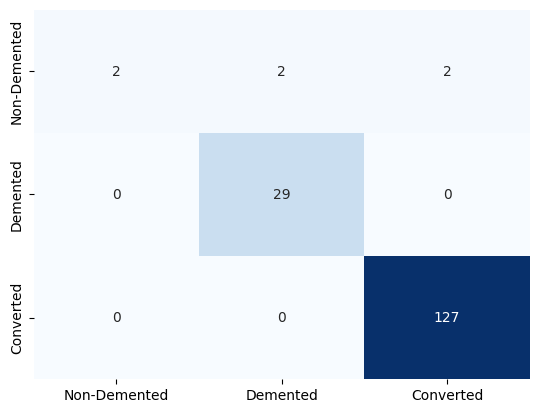

In [60]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels=['Non-Demented', 'Demented', 'Converted'], yticklabels=['Non-Demented', 'Demented', 'Converted'])

In [61]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val, y_pred))

0.9753086419753086
